In [1]:
import numpy as np 
import pandas as pd 
from math import *
import matplotlib.pyplot as plt

In [10]:
CFL = 1.0  
pre_matrix = []
p_row0 = []
p_row0.append(1)
for i in range(41):
    p_row0.append(0)
pre_matrix.append(p_row0)
for i in range(1, 42):
    p_row = []
    for j in range(42):
        if j == i-1:
            p_row.append(-CFL)
        elif j == i:
            p_row.append(1.0)
        elif j == i+1:
            p_row.append(CFL)
        else:
            p_row.append(0)
    pre_matrix.append(p_row)
#print(pre_matrix)
p_matrix = np.asarray(pre_matrix)
#print(p_matrix)

matrix = np.linalg.inv(p_matrix)

u_0 = np.zeros((42))  # u_i is u vector at time i 
for i in range(42):
    if i*2/42 <= 0.5:
        u_0[i] = 1
    else:
        u_0[i] = 2
#print(u_0)

U = []
U.append(u_0)
for i in range(1, 11):
    j = i-1
    u_i = np.dot(matrix, U[j])
    U.append(u_i)

final_U = np.asarray(U)
print(final_U.shape)

(11, 42)


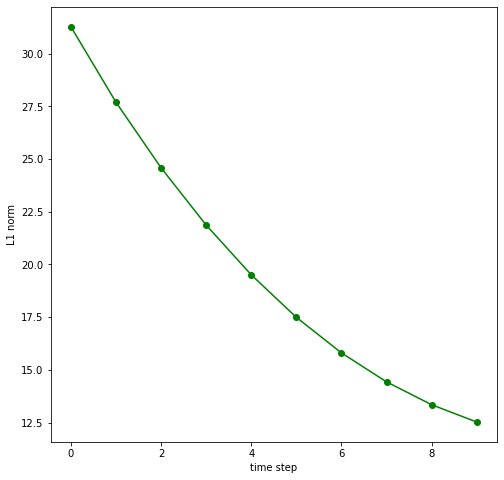

In [17]:
delta_x = 2/42
delta_t = 2*delta_x     #    2 = C*delta_t/delta_x   where C = 1  
norm_vect = []
#norm_vect.append(0)

for i in range(1, 11):
    analytic = []
    for j in range(42):
        u_temp = u_0[j]*exp(j*delta_x - i*delta_t)
        analytic.append(u_temp)
    nume = []
    nume = final_U[i]
    norm = np.linalg.norm((nume - analytic))
    norm_vect.append(norm)

t = [i for i in range(10)]    
plt.subplots(figsize = (8,8))
plt.xlabel("time step")
plt.ylabel("L1 norm")
plt.plot(t, norm_vect, 'go-')